# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [2]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [3]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

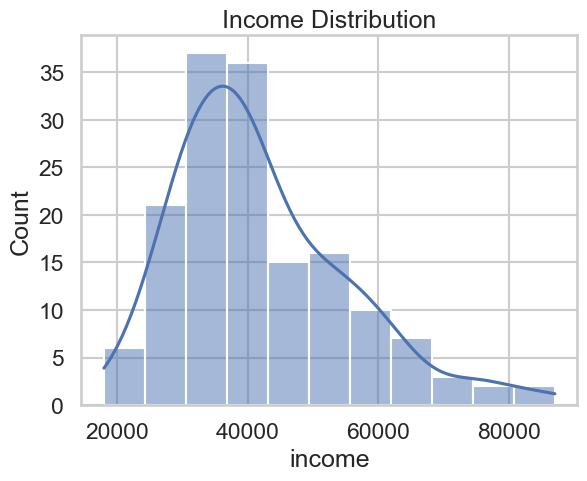

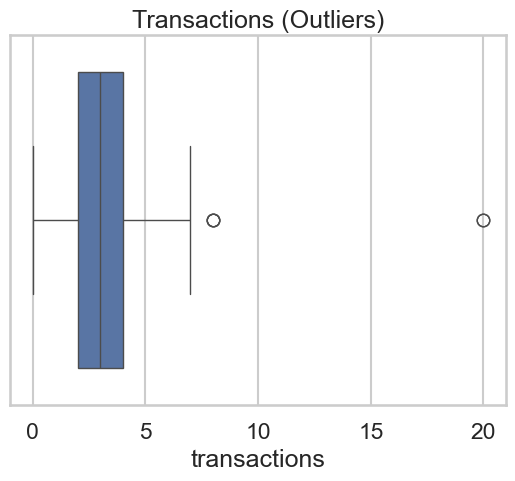

In [4]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()

## 4) Relationships (TODO: add at least 2)

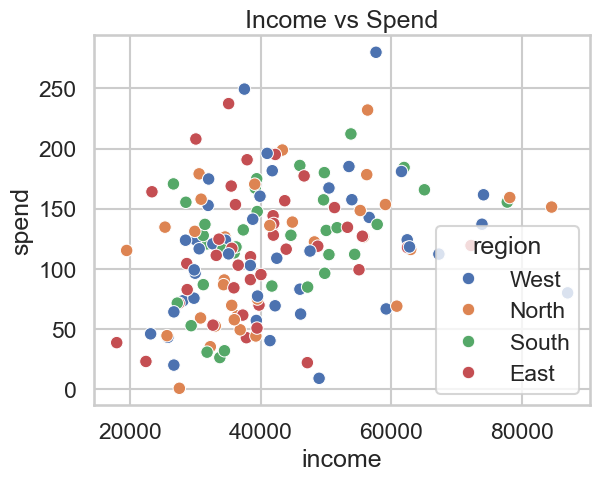

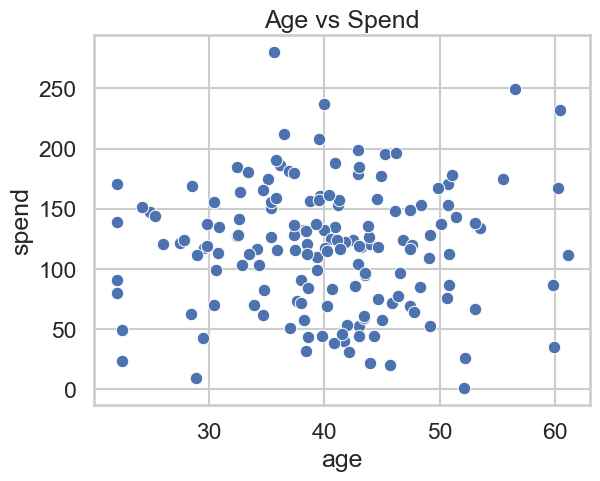

In [5]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

## 5) (Optional) Correlation matrix

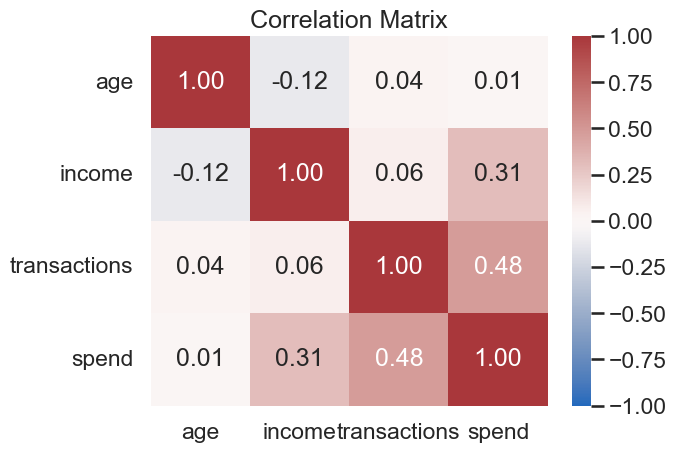

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [6]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr


# ─────────────────────────────────────────────────────────────
## Added EDA from *SME Credit Risk* Notebook


In [5]:
import os
print(os.getcwd())

/Users/hitakshikulhare/bootcamp_hitakshi_kulhare/homework/homework8


## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)
  

In [28]:
import pandas as pd

# Load data
df1 = pd.read_csv(
    "/Users/hitakshikulhare/bootcamp_hitakshi_kulhare/project/data/german.data-numeric",
    sep=r"\s+", header=None, engine="python"
)

n_cols = df1.shape[1]
if n_cols < 2:
    raise ValueError(f"Unexpected column count: {n_cols}")

if n_cols == 21:
    # Classic: 20 features + target
    cols = [
        "checking_status", "duration_months", "credit_history", "purpose", "credit_amount",
        "savings_status", "employment_since", "installment_rate_pct", "personal_status_sex", "other_debtors",
        "residence_since", "property_magnitude", "age_years", "other_installment_plans", "housing",
        "number_existing_credits", "job", "people_liable_maintenance", "telephone", "foreign_worker",
        "target"
    ]
elif n_cols == 25:
    # Statlog numeric variant: 24 features + target
    cols = [
        "checking_status", "duration_months", "credit_history", "purpose", "credit_amount",
        "savings_status", "employment_since", "installment_rate_pct", "personal_status_sex", "other_debtors",
        "residence_since", "property_magnitude", "age_years", "other_installment_plans", "housing",
        "number_existing_credits", "job", "people_liable_maintenance", "telephone", "foreign_worker",
        "extra_indicator_1", "extra_indicator_2", "extra_indicator_3", "extra_indicator_4",
        "target"
    ]
else:
    # Fallback generic naming
    cols = [f"feature_{i}" for i in range(n_cols-1)] + ["target"]

# assign proper names
df1.columns = cols

# Encode target (1 = good, 2 = bad → convert to binary 1/0)
df1["target"] = df1["target"].map({1: 1, 2: 0})

# Create encoded copy
df1_encoded = df1.copy()


df1.columns = cols

# Map target: 1 = good, 2 = bad  -> 0 = good, 1 = bad
df1["target"] = df1["target"].map({1: 0, 2: 1})

print("Shape:", df1.shape)
print("First rows:")
display(df1.head())

print("\nClass balance (0=good, 1=bad):")
print(df1["target"].value_counts(normalize=True).round(3))
print("\nMissing values per column (top 10 shown):")
print(df1.isna().sum().sort_values(ascending=False).head(10))

Shape: (1000, 25)
First rows:


,checking_status,duration_months,credit_history,purpose,credit_amount,savings_status,employment_since,installment_rate_pct,personal_status_sex,other_debtors,...,number_existing_credits,job,people_liable_maintenance,telephone,foreign_worker,extra_indicator_1,extra_indicator_2,extra_indicator_3,extra_indicator_4,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0.0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,NaN
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0.0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0.0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,NaN



Class balance (0=good, 1=bad):
target
0.0    1.0
Name: proportion, dtype: float64

Missing values per column (top 10 shown):
target                       300
other_installment_plans        0
extra_indicator_4              0
extra_indicator_3              0
extra_indicator_2              0
extra_indicator_1              0
foreign_worker                 0
telephone                      0
people_liable_maintenance      0
job                            0
dtype: int64


In [29]:
for c in [col for col in df1.columns if col.startswith("extra_indicator_")]:
    print(c)
    print(df1[c].value_counts().sort_index(), "\n")

extra_indicator_1
extra_indicator_1
0    287
1    713
Name: count, dtype: int64 

extra_indicator_2
extra_indicator_2
0    978
1     22
Name: count, dtype: int64 

extra_indicator_3
extra_indicator_3
0    800
1    200
Name: count, dtype: int64 

extra_indicator_4
extra_indicator_4
0    370
1    630
Name: count, dtype: int64 



In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [31]:
print("Shape:", df1.shape)
print("\nData types:\n", df1.dtypes)
print("\nMissing values:\n", df1.isna().sum())
print("\nTarget distribution:\n", df1['target'].value_counts(normalize=True))

Shape: (1000, 25)

Data types:
 checking_status                int64
duration_months                int64
credit_history                 int64
purpose                        int64
credit_amount                  int64
savings_status                 int64
employment_since               int64
installment_rate_pct           int64
personal_status_sex            int64
other_debtors                  int64
residence_since                int64
property_magnitude             int64
age_years                      int64
other_installment_plans        int64
housing                        int64
number_existing_credits        int64
job                            int64
people_liable_maintenance      int64
telephone                      int64
foreign_worker                 int64
extra_indicator_1              int64
extra_indicator_2              int64
extra_indicator_3              int64
extra_indicator_4              int64
target                       float64
dtype: object

Missing values:
 checking_st

In [32]:
import numpy as np

numeric_cols = ["duration_months", "credit_amount", "age_years"]

for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df1[col] < lower) | (df1[col] > upper)).sum()
    print(f"{col}: {outliers} outliers (bounds: {lower:.1f}, {upper:.1f})")

duration_months: 70 outliers (bounds: -6.0, 42.0)
credit_amount: 0 outliers (bounds: -2.0, 6.0)
age_years: 155 outliers (bounds: 1.0, 1.0)


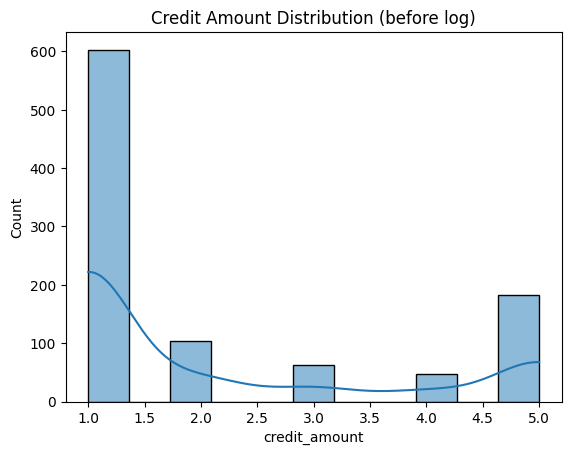

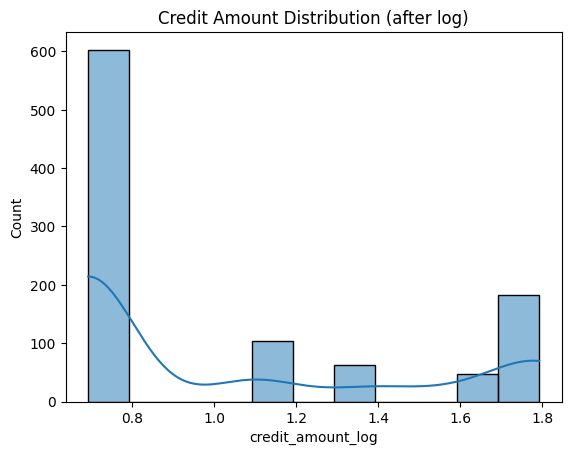

In [33]:
sns.histplot(df1["credit_amount"], kde=True)
plt.title("Credit Amount Distribution (before log)")
plt.show()

#LOG TRANSFORM
df1["credit_amount_log"] = np.log1p(df1["credit_amount"])
sns.histplot(df1["credit_amount_log"], kde=True)
plt.title("Credit Amount Distribution (after log)")
plt.show()

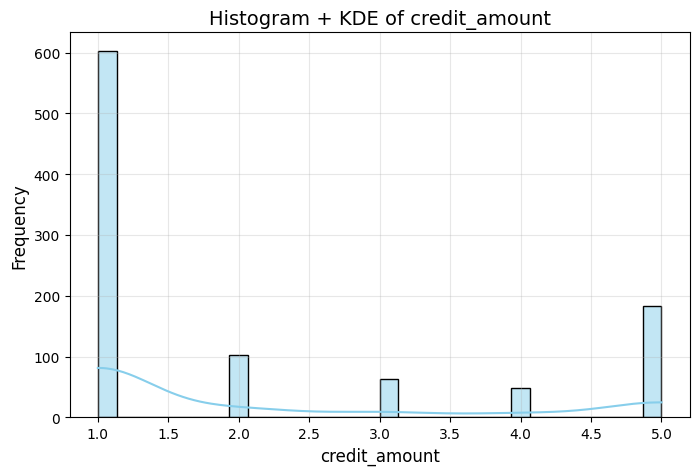

In [34]:
key_var = "credit_amount"   # <-- change this to whichever column you want

plt.figure(figsize=(8,5))
sns.histplot(df1_encoded[key_var], kde=True, bins=30, color="skyblue", edgecolor="black")

plt.title(f"Histogram + KDE of {key_var}", fontsize=14)
plt.xlabel(key_var, fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

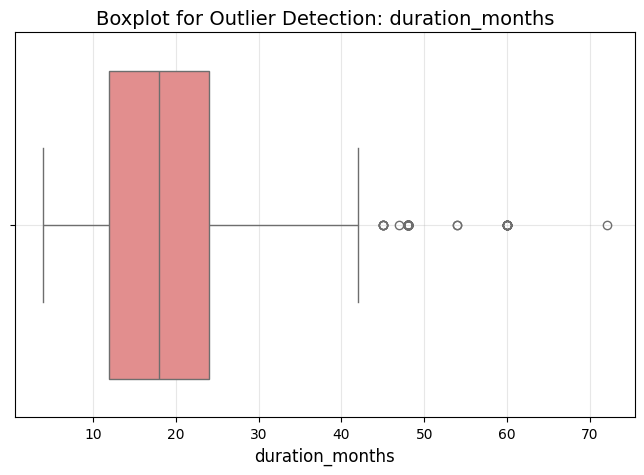

In [36]:
key_var = "duration_months"   

plt.figure(figsize=(8,5))
sns.boxplot(x=df1_encoded[key_var], color="lightcoral")

plt.title(f"Boxplot for Outlier Detection: {key_var}", fontsize=14)
plt.xlabel(key_var, fontsize=12)
plt.grid(alpha=0.3)
plt.show()

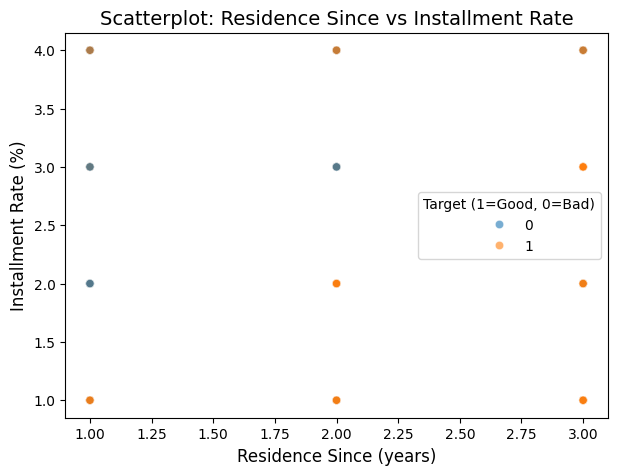

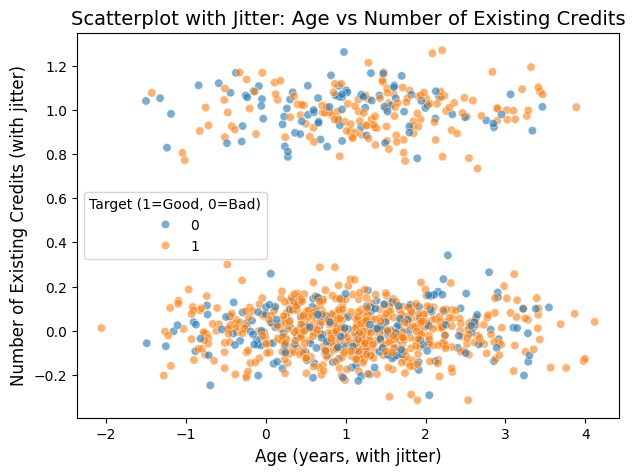

In [38]:
# Scatterplot: Credit Amount vs Duration
#Scatterplot: Residence Since vs Installment Rate (less linear relationship)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df1_encoded,
    x="residence_since",
    y="installment_rate_pct",
    hue="target",
    alpha=0.6
)
plt.title("Scatterplot: Residence Since vs Installment Rate", fontsize=14)
plt.xlabel("Residence Since (years)", fontsize=12)
plt.ylabel("Installment Rate (%)", fontsize=12)
plt.legend(title="Target (1=Good, 0=Bad)")
plt.show()

#Scatterplot with Jitter: Age vs Number of Existing Credits
plt.figure(figsize=(7,5))

x = df1_encoded["age_years"] + np.random.normal(0, 1, size=len(df1_encoded))
y = df1_encoded["number_existing_credits"] + np.random.normal(0, 0.1, size=len(df1_encoded))

sns.scatterplot(
    x=x,
    y=y,
    hue=df1_encoded["target"],
    alpha=0.6
)
plt.title("Scatterplot with Jitter: Age vs Number of Existing Credits", fontsize=14)
plt.xlabel("Age (years, with jitter)", fontsize=12)
plt.ylabel("Number of Existing Credits (with jitter)", fontsize=12)
plt.legend(title="Target (1=Good, 0=Bad)")
plt.show()

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
  1. **Credit Amount vs Duration**  
   Higher credit amounts are often associated with longer credit durations. However, the scatterplot also shows that bad credit cases (target = 0) are present across both low and high credit amounts, suggesting duration alone is not a sufficient predictor.

  2. **Age Distribution**  
   Most applicants fall within the 20–40 age range. Outliers exist at higher ages, but they are     relatively few and may need careful handling to avoid skewing the model.

  3. **Installment Rate & Housing**  
   Clients with lower installment rates tend to be spread across housing categories, but default cases (target = 0) appear slightly more concentrated in certain categories, indicating potential interaction effects.

## TODO: Assumptions & risks

- **Data Quality Assumption**: The dataset is assumed to be accurate and representative of SME borrowers. If data collection was biased (e.g., only certain industries or demographics), results may not generalize.
- **Stationarity Assumption**: Risk patterns are assumed stable over time. Economic shifts (e.g., interest rates, inflation) could make historical defaults less predictive of future behavior.
- **Risk of Multicollinearity**: Some features (e.g., duration and credit amount) may be strongly correlated, which could inflate variance in models if not addressed.

---
## TODO: Next steps before modeling (cleaning & features)
1. **Data Cleaning**  
   - Handle missing values (if any).  
   - Remove or cap extreme outliers (e.g., credit amount, age).  
   - Standardize column names for consistency.

2. **Feature Engineering**  
   - Encode categorical variables (e.g., job, housing, credit history).  
   - Create interaction terms (e.g., credit amount × duration).  
   - Normalize/scale continuous variables (e.g., credit amount, age) for algorithms sensitive to scale.

3. **Data Splitting**  
   - Stratified train-test split to preserve target distribution.  
   - Consider cross-validation for more robust performance estimates.